<a href="https://colab.research.google.com/github/mandyy14/FIAP_1TDS/blob/CP4/559177_Amanda_202402_CP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Dataset Titanic**

##**Instalando Libs Necessárias**


In [28]:
!pip install numpy pandas matplotlib scipy plotly seaborn

In [1]:
#Montando drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Lendo o Dataset**

In [31]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

# Lendo Dataset
df_titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CP4/Titanic-Dataset.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



##**Descrição do conjunto de dados**



###**Quantidade de Linhas x Colunas e Dados Faltantes (Null)**




In [43]:
# Linhas e colunas
print(f"Linhas: {df_titanic.shape[0]}, Colunas: {df_titanic.shape[1]}\n")

# Dados faltantes
print("Dados faltantes por coluna: \n", df_titanic.isnull().sum())

import pandas as pd

# Identificar colunas categóricas que são úteis para análise
categorical_columns = df_titanic.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluindo colunas que não são úteis
categorical_columns = [col for col in categorical_columns if col not in ['Name', 'Ticket', 'Cabin']]

# Adicionando colunas numéricas que representam categorias
binary_columns = ['Survived', 'Pclass']  #Categóricas binárias

print("Colunas categóricas úteis para análise:", categorical_columns + binary_columns)


Linhas: 891, Colunas: 12

Dados faltantes por coluna: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Colunas categóricas úteis para análise: ['Sex', 'Embarked', 'Survived', 'Pclass']


**Quais são as colunas que possuem dados categóricos?**

As colunas que possuem dados catégoricos são:


*   'Sex'- male ou female
*   'Embarked' - C, Q, S
*   'Survived' - 1 sim ou 0 não
*   'Pclass'- 1 para primeira classe ou 3 para terceira classe

'**Cabin, Name e Ticket**' estavam sendo definidos como um tipo 'object', mas os removi da análise, pois **Name** e **Ticket** são dados únicos e **Cabin** tem muitos valores faltando.


Essas colunas com dados catégoricos foram identificadas a partir desse código:

```
# Identificar colunas categóricas que são úteis para análise
categorical_columns = df_titanic.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluindo colunas que não são úteis
categorical_columns = [col for col in categorical_columns if col not in ['Name', 'Ticket', 'Cabin']]

# Adicionando colunas numéricas que representam categorias
binary_columns = ['Survived', 'Pclass']  #Categóricas binárias

print("Colunas categóricas úteis para análise:", categorical_columns + binary_columns)


```
Para identificar colunas categóricas, analisei colunas que contêm dados de texto ou que representam categorias. No **pandas**, dados categóricos normalmente têm o tipo **object** ou **category**.







##**Utilizando Métricas descritivas para analisar o conjunto de dados**

###**Moda - Média - Mediana - Variância - Desvio Padrão**




In [18]:
# Moda
mode_values = df_titanic.mode().iloc[0]

# Média e Mediana utilizando NumPy
mean_fare = np.mean(df_titanic['Fare'])
median_fare = np.median(df_titanic['Fare'])
mean_age = np.mean(df_titanic['Age'].dropna())
median_age = np.median(df_titanic['Age'].dropna())

# Variância e Desvio Padrão utilizando SciPy
variance_fare = stats.tvar(df_titanic['Fare'])
std_dev_fare = stats.tstd(df_titanic['Fare'])
variance_age = stats.tvar(df_titanic['Age'].dropna())
std_dev_age = stats.tstd(df_titanic['Age'].dropna())

# Resultados
print(f"Moda das colunas:\n{mode_values}\n")
print(f"Média de 'Fare': {mean_fare}, Mediana de 'Fare': {median_fare}")
print(f"Variância de 'Fare': {variance_fare}, Desvio Padrão de 'Fare': {std_dev_fare}")
print(f"Média de 'Age': {mean_age}, Mediana de 'Age': {median_age}")
print(f"Variância de 'Age': {variance_age}, Desvio Padrão de 'Age': {std_dev_age}")

Moda das colunas:
PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

Média de 'Fare': 32.204207968574636, Mediana de 'Fare': 14.4542
Variância de 'Fare': 2469.436845743116, Desvio Padrão de 'Fare': 49.6934285971809
Média de 'Age': 29.69911764705882, Mediana de 'Age': 28.0
Variância de 'Age': 211.01912474630805, Desvio Padrão de 'Age': 14.526497332334042


###**Qual é a moda, a média, a mediana, a variância e o desvio padrão das colunas Fare e Age?**

In [19]:
# Moda das colunas 'Fare' e 'Age'
fare_mode = df_titanic['Fare'].mode()[0]
age_mode = df_titanic['Age'].mode()[0]

# Média das colunas 'Fare' e 'Age'
fare_mean = df_titanic['Fare'].mean()
age_mean = df_titanic['Age'].mean()

# Mediana das colunas 'Fare' e 'Age'
fare_median = df_titanic['Fare'].median()
age_median = df_titanic['Age'].median()

# Variância das colunas 'Fare' e 'Age'
fare_variance = df_titanic['Fare'].var()
age_variance = df_titanic['Age'].var()

# Desvio padrão das colunas 'Fare' e 'Age'
fare_std = df_titanic['Fare'].std()
age_std = df_titanic['Age'].std()

# Exibir os resultados
print(f"Moda (Fare): {fare_mode}, Moda (Age): {age_mode}")
print(f"Média (Fare): {fare_mean}, Média (Age): {age_mean}")
print(f"Mediana (Fare): {fare_median}, Mediana (Age): {age_median}")
print(f"Variância (Fare): {fare_variance}, Variância (Age): {age_variance}")
print(f"Desvio Padrão (Fare): {fare_std}, Desvio Padrão (Age): {age_std}")


Moda (Fare): 8.05, Moda (Age): 24.0
Média (Fare): 32.204207968574636, Média (Age): 29.69911764705882
Mediana (Fare): 14.4542, Mediana (Age): 28.0
Variância (Fare): 2469.436845743116, Variância (Age): 211.01912474630802
Desvio Padrão (Fare): 49.6934285971809, Desvio Padrão (Age): 14.526497332334042


**Coluna Fare**



* Moda: A tarifa que mais se repete entre os passageiros. No dataset do Titanic,a moda de Fare é 8.05, indicando que a tarifa de 8.05 foi a mais frequente.

* Média: O valor médio das tarifas pagas pelos passageiros. A média de Fare é aproximadamente 32.2, mostrando que o valor médio pago foi 32.2.

* Mediana: O ponto médio da distribuição das tarifas. A mediana de Fare é 14.45, sugerindo que metade dos passageiros pagou menos que 14.45 e a outra metade pagou mais.

* Variância: A variância de Fare é 2469.44, indicando o grau de dispersão das tarifas em relação à média.

* Desvio Padrão: O desvio padrão de Fare é 49.69, mostrando a quantidade de variação ou dispersão das tarifas.

**Coluna Age**


* Moda: A idade que mais se repete entre os passageiros. No dataset do Titanic, a moda de Age é 24.0, indicando que a idade de 24 anos foi a mais comum.

* Média: A média de Age é aproximadamente 29.7, o que mostra que a idade média dos passageiros era de 29.7 anos.

* Mediana: O ponto médio da distribuição das idades. A mediana de Age é 28.0, sugerindo que metade dos passageiros tinha menos de 28 anos e a outra metade tinha mais.

* Variância: A variância de Age é 211.02, indicando o grau de dispersão das idades em relação à média.

* Desvio Padrão: O desvio padrão de Age é 14.52, mostrando a quantidade de variação ou dispersão das idades.


### **Qual é a quantidade de embarques de cada porto presente no dataset?**

In [21]:
# Contagem de embarques por porto
embarked_counts = df_titanic['Embarked'].value_counts()
print("Quantidade de embarques por porto:\n", embarked_counts)


Quantidade de embarques por porto:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


A quantidade de embarques de cada porto presente no dataset é de:
* (S): 644 embarques
* (C): 168 embarques
* (Q): 77 embarques

### **Qual é a proporção de sobreviventes?**



In [23]:
# Proporção de sobreviventes
survived_proportion = df_titanic['Survived'].value_counts(normalize=True)
print("\nProporção de sobreviventes:\n", survived_proportion)


Proporção de sobreviventes:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


A proporção de sobreviventes é de:

* 0   Não sobreviveram: Aproximadamente 61,6%
* 1   Sobreviveram: Aproximadamente 38,4%



###**Quais são os passageiros com a menor e a maior idade presentes nos registros?**

In [25]:
# Passageiro menor e maior idade
min_age_passenger = df_titanic.loc[df_titanic['Age'].idxmin()]
max_age_passenger = df_titanic.loc[df_titanic['Age'].idxmax()]

print("\nPassageiro com a menor idade:\n", min_age_passenger)
print("\nPassageiro com a maior idade:\n", max_age_passenger)


Passageiro menores de idade:
 PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

Passageiro maiores de idade:
 PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                

**Menor Idade:**
A menor idade registrada é 0.42 anos, que corresponde a um bebê de aproximadamente 5 meses de idade.

**Maior Idade:**
A maior idade registrada é 80 anos.

###**Criando visualizações das análises realizadas**



**Quantidade de Sobreviventes e Não Sobreviventes por Classe de Embarque**

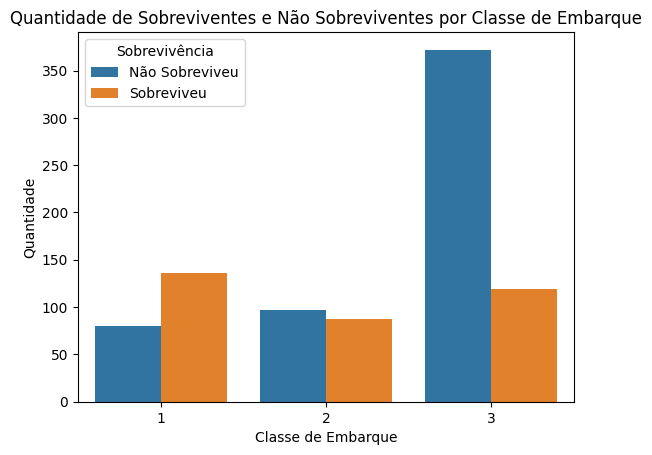

In [33]:
# Carregar os dados do Titanic
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CP4/Titanic-Dataset.csv')

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Quantidade de Sobreviventes e Não Sobreviventes por Classe de Embarque')
plt.xlabel('Classe de Embarque')
plt.ylabel('Quantidade')
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

Interpretação: Podemos observar que a maior parte dos sobreviventes estava na primeira classe. Porém, a terceira classe foi a que teve mais vítimas. Isso pode indicar que os passageiros das classes superiores tiveram maior acesso aos recursos para sobreviverem

**Relação entre Idade e Valor Pago na Passagem de Acordo com a Coluna Sex**


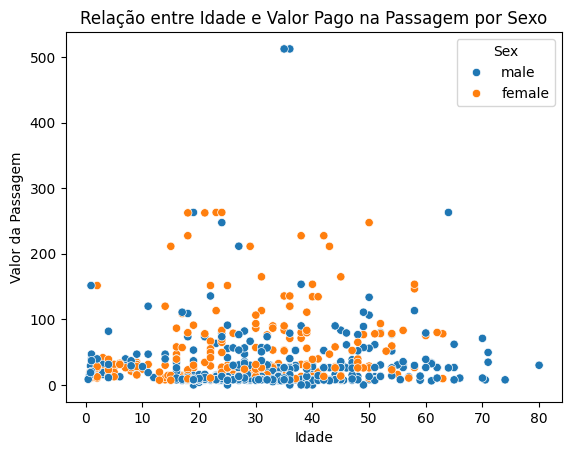

In [34]:
sns.scatterplot(x='Age', y='Fare', hue='Sex', data=df)
plt.title('Relação entre Idade e Valor Pago na Passagem por Sexo')
plt.xlabel('Idade')
plt.ylabel('Valor da Passagem')
plt.show()

Interpretação: Os homens parecem ter pago menos pela passagem do que as mulheres, com algumas exceções em idades mais avançadas, onde o valor da passagem é significativamente maior.

**Relação entre Idade e Valor Pago na Passagem de Acordo com a Coluna Survived**

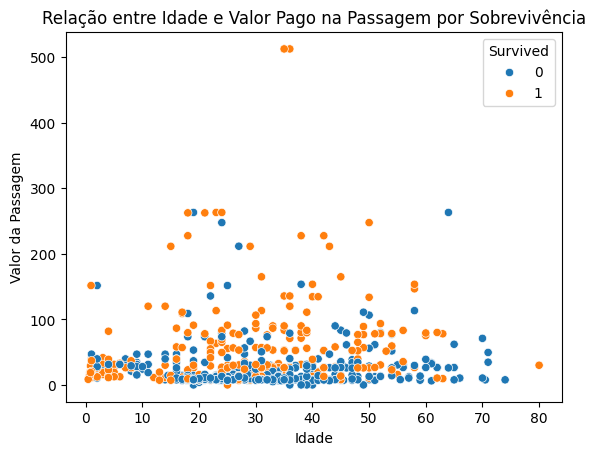

In [35]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Relação entre Idade e Valor Pago na Passagem por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Valor da Passagem')
plt.show()

Interpretação: Os passageiros que pagaram valores mais altos sobreviveram mais enquanto aqueles que pagaram menos tiveram menor chance de sobrevivência.

**Relação entre Idade e Valor Pago na Passagem de Acordo com a Coluna Embarked**


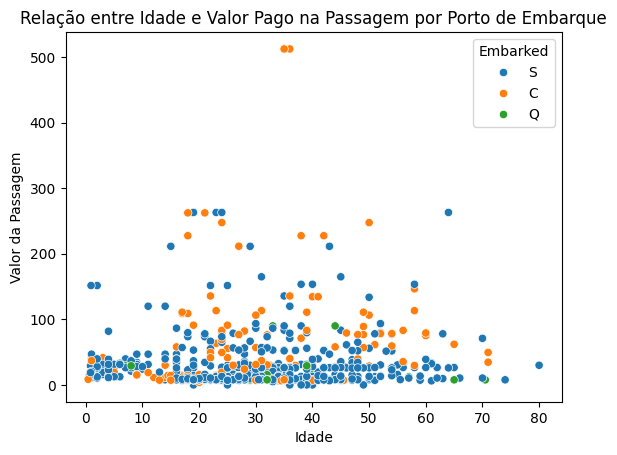

In [36]:
sns.scatterplot(x='Age', y='Fare', hue='Embarked', data=df)
plt.title('Relação entre Idade e Valor Pago na Passagem por Porto de Embarque')
plt.xlabel('Idade')
plt.ylabel('Valor da Passagem')
plt.show()


Interpretação: Os passageiros que embarcaram em (C) pagaram mais pelas passagens, enquanto os (S) e (Q) pagaram menos. Isso significa que C pode ter sido um porto de embarque preferido por passageiros mais ricos.

**Relação entre Idade e Valor Pago na Passagem de Acordo com a Coluna Pclass**

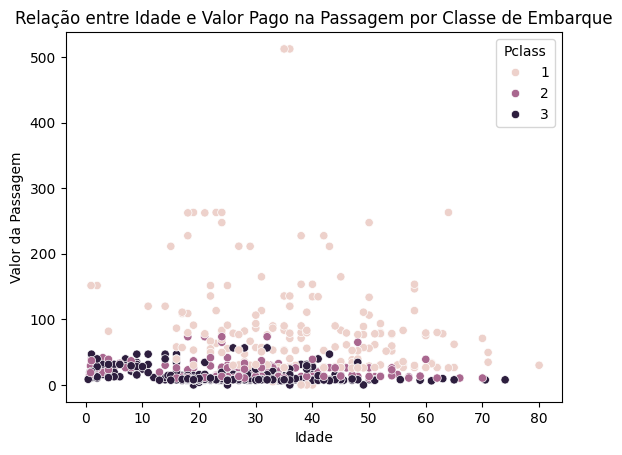

In [37]:
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df)
plt.title('Relação entre Idade e Valor Pago na Passagem por Classe de Embarque')
plt.xlabel('Idade')
plt.ylabel('Valor da Passagem')
plt.show()


Interpretação: A primeira classe pagou valores mais altos pelas passagens, enquanto a terceira classe pagou valores significativamente menores.

**Quantidade de Male e Female**

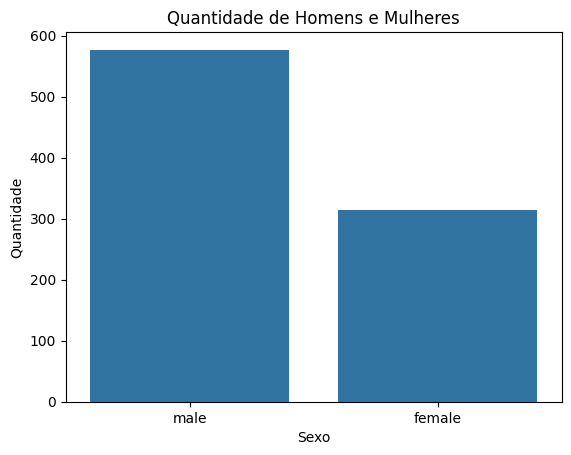

In [38]:
sns.countplot(x='Sex', data=df)
plt.title('Quantidade de Homens e Mulheres')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()


Interpretação: O número de homens a bordo era significativamente maior que o de mulheres.

**Quantidade de Survived 0 e 1**

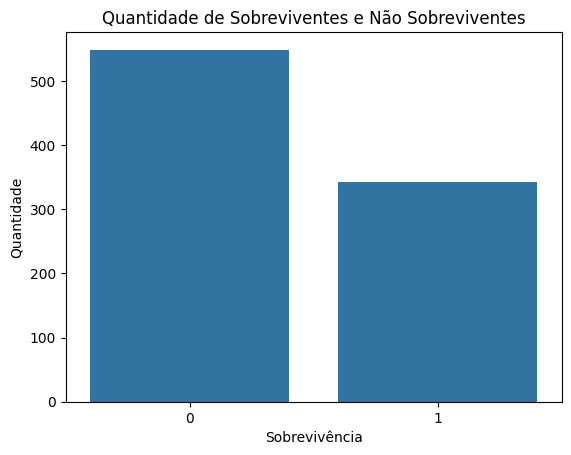

In [39]:
sns.countplot(x='Survived', data=df)
plt.title('Quantidade de Sobreviventes e Não Sobreviventes')
plt.xlabel('Sobrevivência')
plt.ylabel('Quantidade')
plt.show()


Interpretação: A maioria dos passageiros não sobreviveu ao desastre, podemos entender a partir disso a gravidade do evento.

**Frequência de Age**

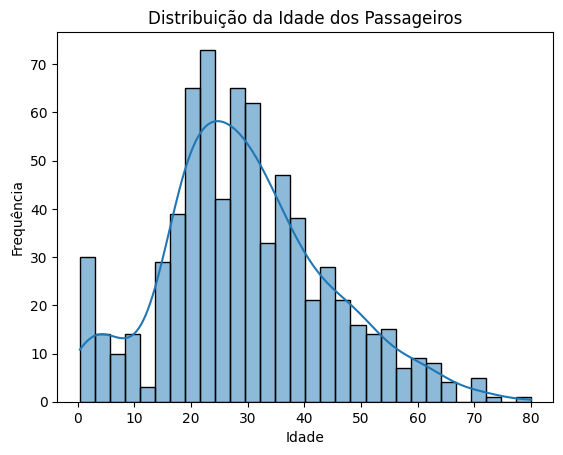

In [40]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribuição da Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


Interpretação: A maioria dos passageiros estava na faixa dos 20 a 40 anos, com uma diminuição acentuada na frequência em idades mais avançadas.

**Frequência de Fare**

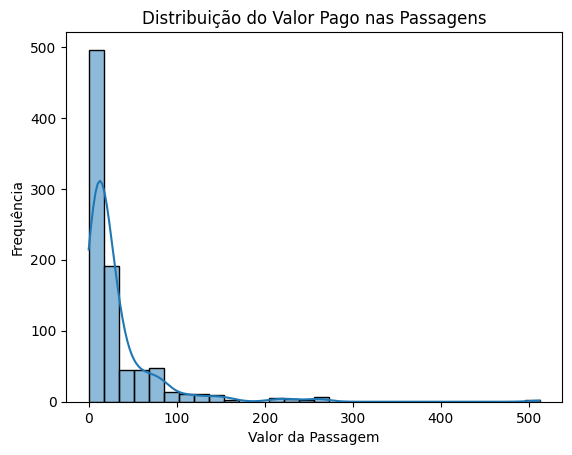

In [41]:
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribuição do Valor Pago nas Passagens')
plt.xlabel('Valor da Passagem')
plt.ylabel('Frequência')
plt.show()


Interpretação: A maior parte dos passageiros pagou valores mais baixos pelas passagens, com uma parte mais longa indicando que alguns passageiros pagaram valores muito altos.

**Frequência de Embarked**

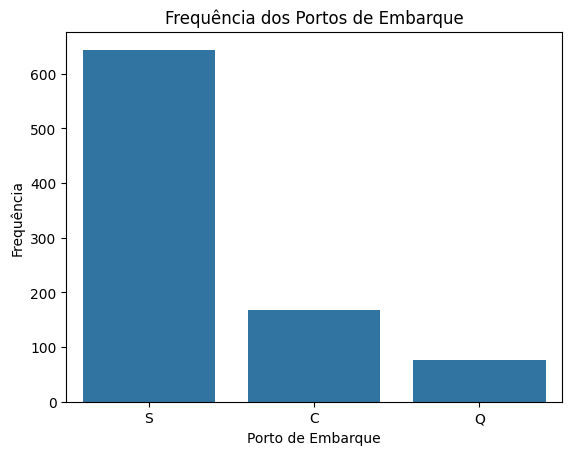

In [42]:
sns.countplot(x='Embarked', data=df)
plt.title('Frequência dos Portos de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Frequência')
plt.show()


Interpretação: (S) foi o porto de embarque mais comum, seguido por (C) e (Q), indicando que a maioria dos passageiros embarcou no (S).